In [238]:
import networkx as nx
import igraph as ig

In [239]:
def PNSubGraph(visited, graph, node):
  visited.append(node)
  queue.append(node)
  
  PN[node] = [element *-1 for element in data[node][0:threshPN]]
  Level[node] = 0 
  while queue:
    s = queue.pop(0) 
    print (s, end = " ") 
    
    if s not in list(data.keys()) : 
        break
    len_pn = len(PN[s])
    if  len_pn < 2 : 
       for i in data[s][0:threshPN-len_pn] :
            PN[s].append(-1*i)
    for neighbour in data[s]:
       if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)
        
        #Distance_Path_To_Root = Level[s] + Distance[s][neighbour]
        #Have_Parent = CheckHaveParent(PN[neighbour])
        # if  Have_Parent : 
        #     Level[neighbour] = Distance_Path_To_Root
        # else :
        #     Level[neighbour] = -Distance_Path_To_Root 

       if len(PN[neighbour]) < threshPN : 
           PN[neighbour].append(s)

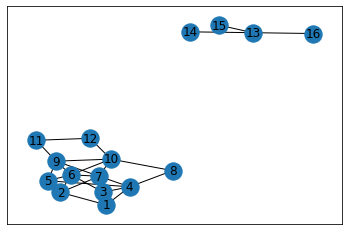

In [240]:
import pandas as pd
G_df = pd.read_csv('primaryschool.csv')
G_df
G = nx.from_pandas_edgelist(G_df, 'Source', 'Target')

nx.draw_networkx(G)

In [241]:
V = list(G.degree())
V.sort(key=lambda tup: tup[0])
V = [list(_) for _ in V]
N_vertex = len(V)
V


[[1, 3],
 [2, 4],
 [3, 4],
 [4, 5],
 [5, 4],
 [6, 6],
 [7, 6],
 [8, 2],
 [9, 5],
 [10, 5],
 [11, 2],
 [12, 2],
 [13, 3],
 [14, 1],
 [15, 1],
 [16, 1]]

In [243]:
edge_df = nx.to_pandas_edgelist(G)
edge_df


,source,target
0,1,2
1,1,3
2,1,4
3,2,5
4,2,6
5,2,7
6,3,4
7,3,6
8,3,7
9,4,5


In [244]:
edge_list = edge_df.values
edge_list

array([[ 1,  2],
       [ 1,  3],
       [ 1,  4],
       [ 2,  5],
       [ 2,  6],
       [ 2,  7],
       [ 3,  4],
       [ 3,  6],
       [ 3,  7],
       [ 4,  5],
       [ 4,  7],
       [ 4,  8],
       [ 5,  6],
       [ 5,  9],
       [ 6,  7],
       [ 6,  9],
       [ 6, 10],
       [ 7,  9],
       [ 7, 10],
       [ 8, 10],
       [ 9, 10],
       [ 9, 11],
       [10, 12],
       [11, 12],
       [13, 15],
       [13, 14],
       [13, 16]], dtype=int64)

In [245]:
E =  [[] for _ in range(N_vertex)]
for e in edge_list:
    E[e[0]].append(e[1])
    E[e[1]].append(e[0])
for e in E:
    e.sort()
E

IndexError: list index out of range

In [ ]:
thresh_PN = 2
level = [N_vertex+1*thresh_PN]*N_vertex
count = [0]*len(V)
C_id = [None] * N_vertex
PN = [[-N_vertex-1]*thresh_PN for _ in range(N_vertex)]
size = [0]*N_vertex
Q = [-1]  
for v in V:
    if level[v[0]] == N_vertex+1*thresh_PN:
        start = 0
        end = 1
        Q.insert(0,v[0])
        level[v[0]] = 0
        C_id[v[0]] = v[0]
        while start!=end:
            stop = end
            i = start
            while i <= end:
                for d in E[Q[i]]:
                    print(E[Q[i]])
                    if level[d]==N_vertex+1*thresh_PN:
                        Q.append(d)
                        end+=1
                        level[d]=level[Q[i]]+1
                        C_id[d]=C_id[Q[i]]
                    if count[d] < thresh_PN:
                        if level[Q[i]] < level[d]:
                            PN[d][count[d]] = Q[i]
                            count[d]+=1
                        elif level[Q[i]] == level[d]:
                            PN[d][count[d]] = -Q[i]
                            count[d]+=1
                i+=1
            start=stop
        size[v[0]]=end          
PN

[1, 2, 3]
[1, 2, 3]
[1, 2, 3]
[11]
[4, 5, 6]
[4, 5, 6]
[4, 5, 6]
[3, 5, 6]
[3, 5, 6]
[3, 5, 6]
[4, 6, 7]
[4, 6, 7]
[4, 6, 7]


IndexError: list index out of range

In [ ]:
import ast
file = open("test.txt", "r")

contents = file.read()
d = ast.literal_eval(contents)

file.close()

V = list(d.keys())
N_vertex = len(V)
V
E = list(d.values())
for i in range(N_vertex):
    V[i]-=1
    for j in range(len(E[i])):
        E[i][j]-=1
V = list(map(lambda el:[el], V))
N_vertex+=1


In [ ]:
V.append([11])
V


[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11]]

In [ ]:
E

[[1, 2, 3],
 [4, 5, 6],
 [3, 5, 6],
 [4, 6, 7],
 [5, 8],
 [6, 8, 9],
 [8, 9],
 [9],
 [9, 10],
 [11],
 [11]]

,Source,Target
0,1,2
1,1,3
2,1,4
3,2,5
4,2,6
5,2,7
6,3,4
7,3,6
8,3,7
9,4,5


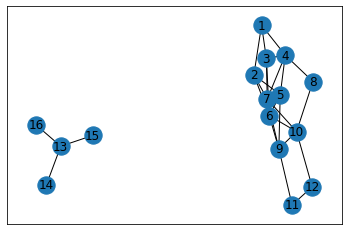